# **SALES PREDICTION USING PYTHON**

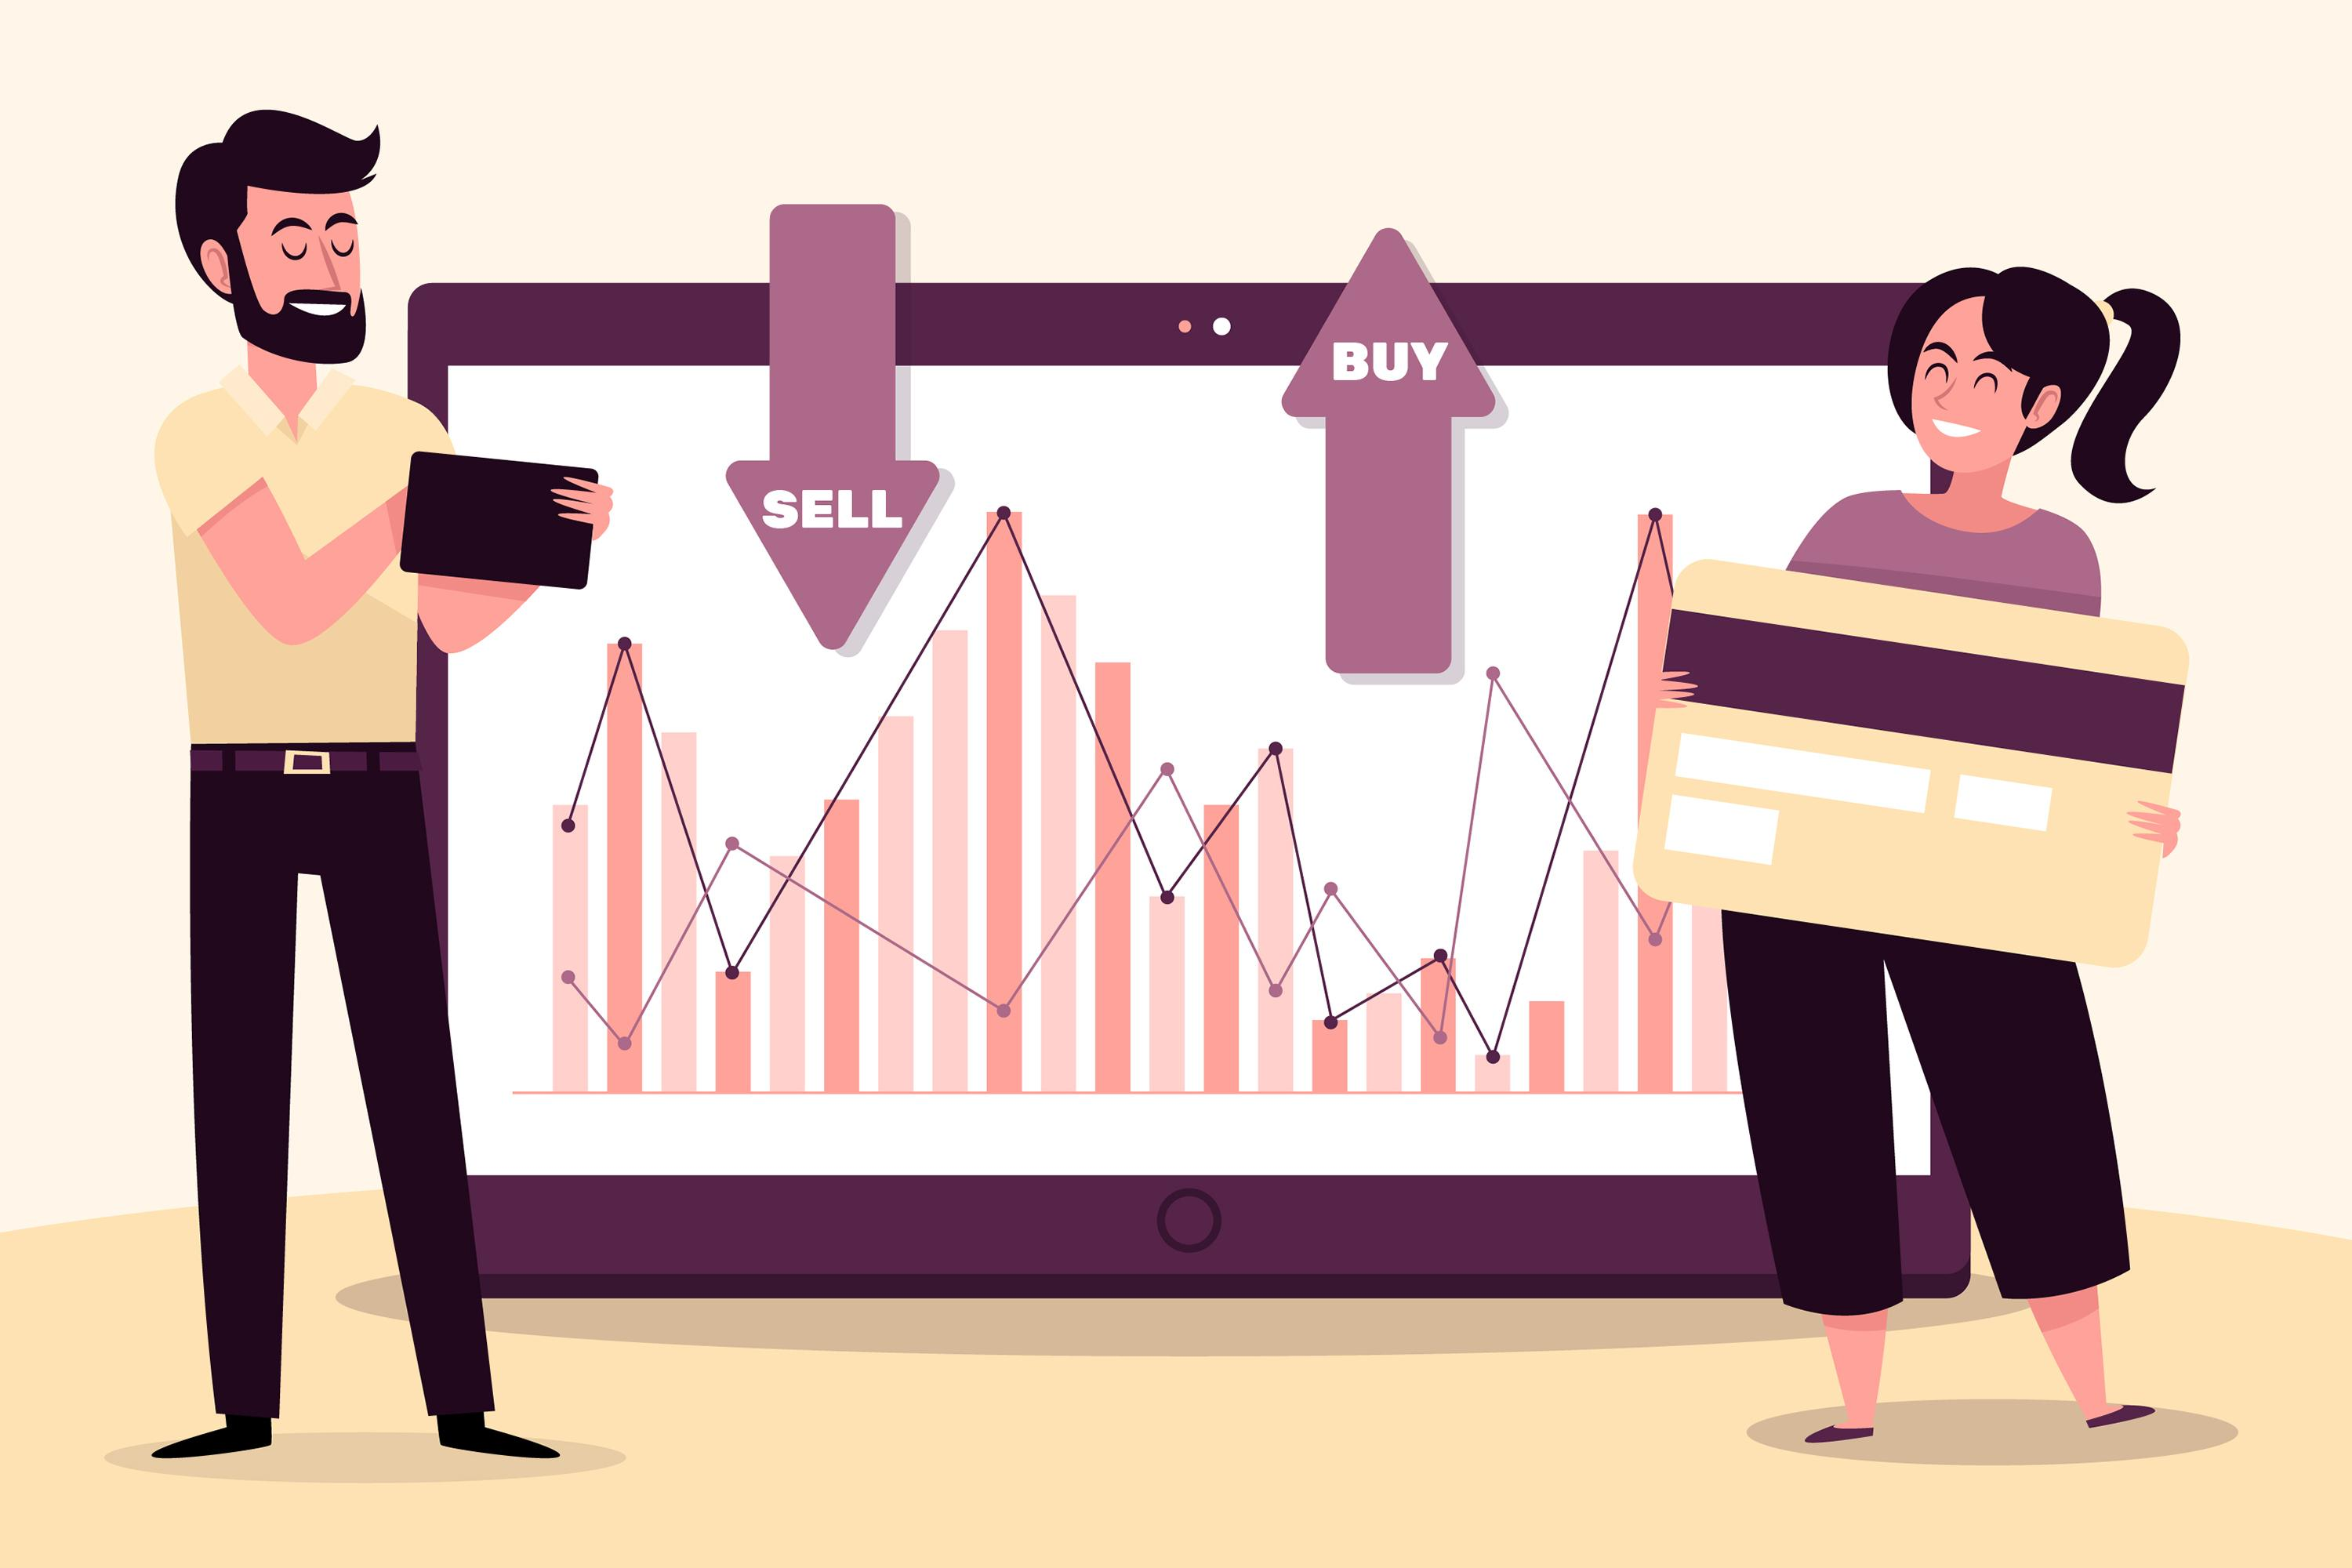

*Download dataset here [SALES PRDICTION](https://drive.google.com/file/d/1zzEyfz-Bj_3ziyzjQ3i7NrnBuOrhkNE0/view?usp=sharing)*

### Knowing about the Dataset

In [ ]:
pip install autoviz

In [ ]:
pip install pycaret

**Importing the Required Libraries**

In [5]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and Seaborn for Plottings
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle Library for Saving the Model
import pickle

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Linear Regression is the Model
from sklearn.linear_model import LinearRegression

# KFold and Cross_Val_Score for Validation
from sklearn.model_selection import cross_val_score

# Metrics is for Analysis of Models
from sklearn import metrics

# Scipy is for Scientific Calculations in Python
from scipy import stats

# ProfileReport is for geting the report of the Dataframe
from pandas_profiling import ProfileReport

# Variance Inflation Rate is for getting the change factor in Variance
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Cleaning Suggestions and Data Suggestions are for cleaning the Dataframe in an unique way
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

# Regression is for importing all the regression models
from pycaret.regression import *

**Reading informations in the Dataset**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
sales = pd.read_csv("/content/drive/MyDrive/Oasis Infobyte/Data Science - Internship/Sales-Prediction-Using-Python/Advertising.csv")

**Checking for null values in Data**

In [9]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Checking the First Five Values in the Data**

In [10]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Checking the Last Five Values in the Data**

In [11]:
sales.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


**Dimensions of the Dataset**

In [12]:
sales.shape

(200, 5)

**Describing the Dataset**

In [13]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Visualization of the Data

**TV Sales Plotting**

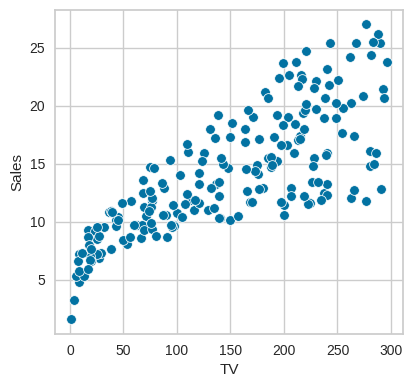

In [14]:
plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['TV'], y = sales['Sales'])
plt.show()

**Radio Sales Plotting**

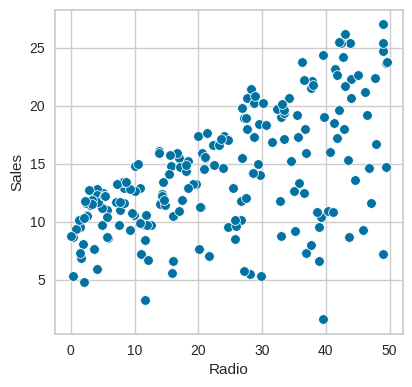

In [15]:
plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['Radio'], y = sales['Sales'])
plt.show()

**Radio Sales Plotting**

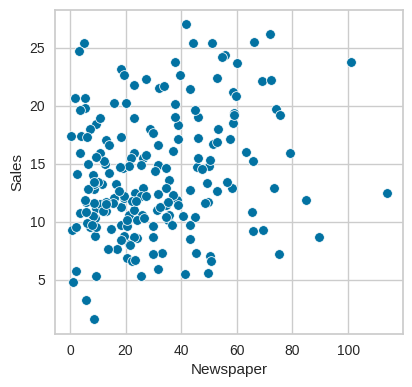

In [16]:
plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['Newspaper'], y = sales['Sales'])
plt.show()

### Data Modeling

**Splitting the Dataset into Training and Testing**

In [17]:
X = sales.drop(['Unnamed: 0','Sales'], axis=1)
Y = sales['Sales']
print("X Dimention: ", X.shape)
print("Y Dimention: ", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

X Dimention:  (200, 3)
Y Dimention:  (200,)


**Checking the Dimensions of Training and Testing Data**

In [18]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (150, 3)
X_Test Shape: (50, 3)
Y_Train Shape: (150, 3)
Y_Test Shape: (50,)


### Model Building

**Creating the Model**

In [19]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
pred = model.predict(X_test)

### Model Testing

**Testing the Model**

In [21]:
print('MAE: ', metrics.mean_absolute_error(pred,Y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(pred,Y_test)))
print('R-Squared: ', metrics.r2_score(pred,Y_test))

MAE:  1.3589661756175426
RMSE:  1.7670302705342986
R-Squared:  0.867331723648149


### Saving Model

**Saving the Model**

In [22]:
filename = "Linear_Regression.pkl"
pickle.dump(model, open(filename, 'wb'))
print("Saved the Model")

Saved the Model


Accuracy of the Linear Regression Model is 86%

### Pycaret

**Comparing Regression Models**

In [23]:
s = setup(data = sales, target = 'Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 5)"
4,Transformed data shape,"(200, 5)"
5,Transformed train set shape,"(140, 5)"
6,Transformed test set shape,"(60, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [24]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4870,0.4736,0.6572,0.9818,0.0699,0.0568,0.5020
gbr,Gradient Boosting Regressor,0.6630,0.7866,0.8574,0.9682,0.0850,0.0716,0.1750
rf,Random Forest Regressor,0.7133,0.8401,0.8900,0.9677,0.0848,0.0737,0.4180
xgboost,Extreme Gradient Boosting,0.7371,1.0121,0.9810,0.9574,0.0935,0.0777,0.1120
ada,AdaBoost Regressor,0.8880,1.2378,1.0774,0.9505,0.0997,0.0914,0.2030
dt,Decision Tree Regressor,0.9236,1.4702,1.1938,0.9339,0.1109,0.0898,0.0480
lightgbm,Light Gradient Boosting Machine,1.0096,1.9894,1.3678,0.9170,0.1453,0.1206,0.2850
llar,Lasso Least Angle Regression,1.3872,3.3382,1.7591,0.8656,0.1724,0.1614,0.0510
lasso,Lasso Regression,1.3872,3.3382,1.7591,0.8656,0.1724,0.1614,0.0850
en,Elastic Net,1.3877,3.3523,1.7612,0.8652,0.1736,0.1622,0.0490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

**Finalizing the Best Model**

In [25]:
etr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4179,0.3977,0.6307,0.9820,0.0424,0.0347
1,0.7176,1.4009,1.1836,0.9549,0.2556,0.2236
2,0.5294,0.5571,0.7464,0.9822,0.0436,0.0384
3,0.3916,0.2425,0.4925,0.9795,0.0365,0.0306
4,0.3891,0.2269,0.4764,0.9817,0.0350,0.0297
5,0.4183,0.2326,0.4823,0.9899,0.0384,0.0361
6,0.5249,0.3842,0.6199,0.9884,0.0540,0.0458
7,0.3770,0.2750,0.5244,0.9858,0.0702,0.0441
8,0.4856,0.3812,0.6174,0.9886,0.0759,0.0451


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
etr = finalize_model(etr)
etr

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'TV', 'Radio',
                                             'Newspaper'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [27]:
preds = predict_model(etr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Accuracy of the Model is 100%